In [4]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import cftime
import datetime
from datetime import date
from matplotlib import pyplot
from matplotlib import colormaps
from matplotlib import colors
from matplotlib import font_manager
from matplotlib.cm import ScalarMappable
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
import numpy
import pandas
from PIL import Image
import pyart
from pyart.testing import get_test_data
import random
import xarray as xr

In [5]:
File = get_test_data('swx_20120520_0641.nc')
Radar = pyart.io.read(File)
Radar

In [6]:
Radar.fields.keys()

dict_keys(['corrected_reflectivity_horizontal', 'reflectivity_horizontal', 'recalculated_diff_phase', 'specific_attenuation', 'unf_dp_phase_shift', 'mean_doppler_velocity', 'diff_phase', 'rain_rate_A', 'norm_coherent_power', 'dp_phase_shift', 'diff_reflectivity', 'proc_dp_phase_shift', 'copol_coeff'])

In [7]:
print(Radar.fields['corrected_reflectivity_horizontal'])

{'_FillValue': -9999.0, 'least_significant_digit': 2, 'units': 'dBZ', 'long_name': 'equivalent_reflectivity_factor', 'valid_min': -45.0, 'valid_max': 80.0, 'standard_name': 'equivalent_reflectivity_factor', 'data': masked_array(
  data=[[-5.671875, 2.28125, -8.1171875, ..., --, -13.4765625, --],
        [-5.6171875, 1.8984375, -10.0703125, ..., -2.6796875, -1.5390625,
         --],
        [-5.0390625, 2.625, -11.484375, ..., -8.984375, --, --],
        ...,
        [-5.9375, 1.46875, -12.3203125, ..., --, --, --],
        [-5.9609375, 1.53125, -12.84375, ..., --, --, --],
        [-8.7890625, 2.9140625, -12.09375, ..., --, --, --]],
  mask=[[False, False, False, ...,  True, False,  True],
        [False, False, False, ..., False, False,  True],
        [False, False, False, ..., False,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],
  

In [8]:
Reflectivity = Radar.fields['corrected_reflectivity_horizontal']['data']
print(type(Reflectivity), Reflectivity)

<class 'numpy.ma.core.MaskedArray'> [[-5.671875 2.28125 -8.1171875 ... -- -13.4765625 --]
 [-5.6171875 1.8984375 -10.0703125 ... -2.6796875 -1.5390625 --]
 [-5.0390625 2.625 -11.484375 ... -8.984375 -- --]
 ...
 [-5.9375 1.46875 -12.3203125 ... -- -- --]
 [-5.9609375 1.53125 -12.84375 ... -- -- --]
 [-8.7890625 2.9140625 -12.09375 ... -- -- --]]


In [9]:
Reflectivity.shape

(8800, 667)

In [10]:
print(Radar.nrays, Radar.ngates)

8800 667


In [11]:
print(Reflectivity[316, 2])

-6.21875


In [12]:
# Plotting Our Radar Data

/glade/u/apps/opt/conda/envs/npl-2023b/lib/python3.10/site-packages/pyart/graph/radarmapdisplay.py:317: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection Lambert Conformal.
  warnings.warn(
/glade/u/apps/opt/conda/envs/npl-2023b/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_1_states_provinces_lines.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


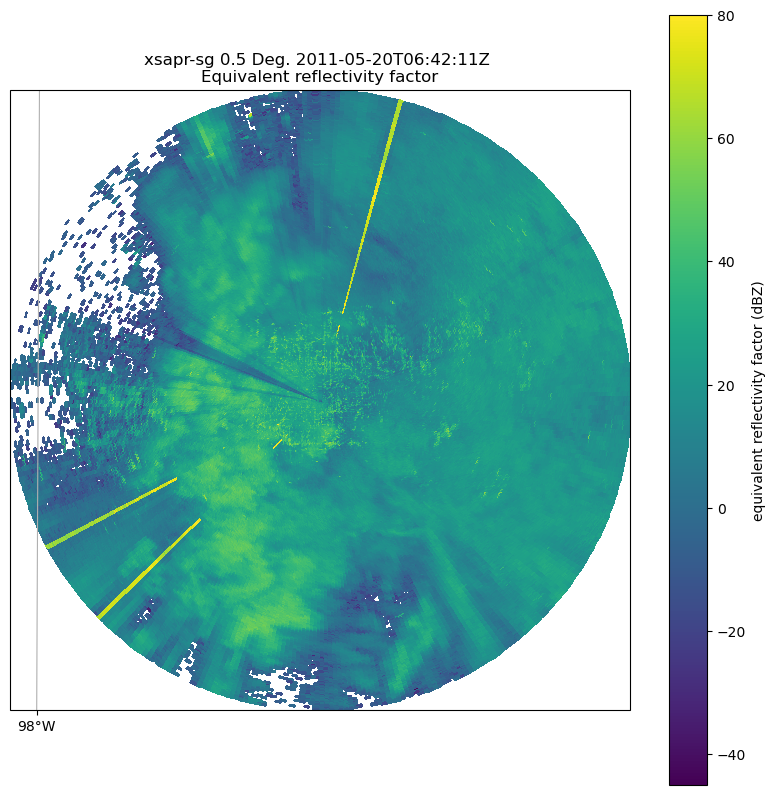

In [13]:
Fig = pyplot.figure(figsize=[10,10])
Display = pyart.graph.RadarMapDisplay(Radar)
Display.plot_ppi_map('corrected_reflectivity_horizontal')

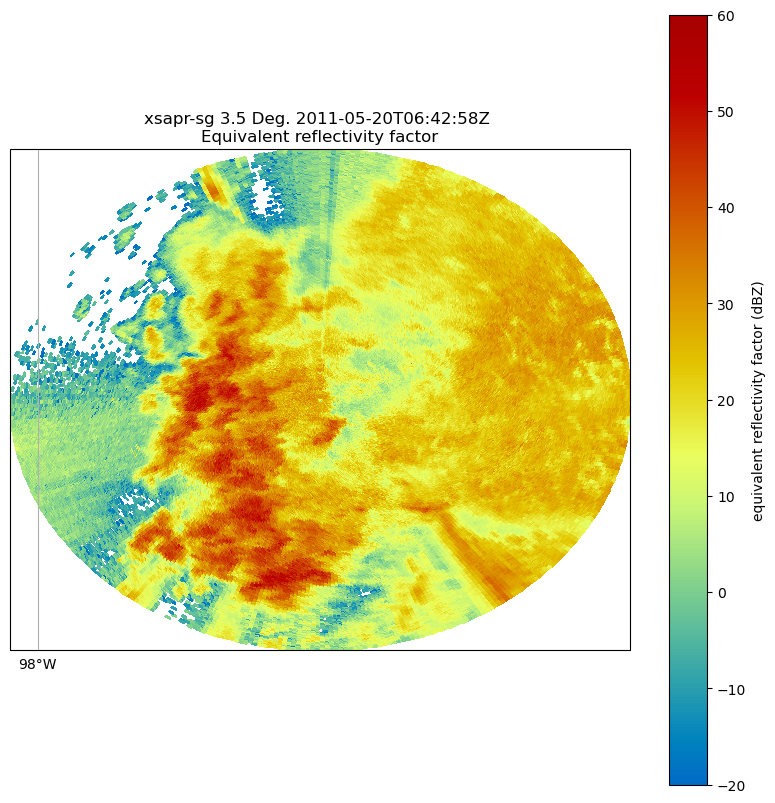

In [14]:
Fig = pyplot.figure(figsize=[10,10])
Display = pyart.graph.RadarMapDisplay(Radar)
Display.plot_ppi_map('corrected_reflectivity_horizontal', sweep=3, vmin=-20, vmax=60, \
projection=ccrs.PlateCarree(), cmap='pyart_HomeyerRainbow')